In [13]:
setwd('/import/DB/fel/BJTC-204')

In [14]:
load('/import/mdd.rna/GSE80655.rda')

ls()

head(expr3,2)

dim(expr3)

library(dplyr)

cliinfo = cliinfo %>%  filter(V4 == 'M')

dim(cliinfo)

head(cliinfo,2)

[1] "cliinfo" "count"   "expr3"   "prot"

,SYMBOL,SL32230,SL32231,SL32242,SL32243,SL32244,SL32245,SL32246,SL32247,SL32248,...,SL7403,SL7404,SL7614,SL7625,SL7632,SL7698,SL7801,SL7804,SL7806,SL7807
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,TSPAN6,76,130,104,147,123,129,150,165,104,...,203,241,301,416,238,198,72,216,335,105
2,TNMD,3,2,3,2,0,4,4,5,3,...,5,5,8,1,4,5,1,3,9,4


[1] 34036    48

[1] 38  6

,V1,V2,V3,V4,V5,V6
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
1,SL32231,46,MD,M,X3064,DLPFC
2,SL32242,32,Control,M,X3186,DLPFC


In [15]:
library(dplyr)

count =expr3 %>% tibble::remove_rownames() %>% tibble::column_to_rownames(.,'SYMBOL')

table(cliinfo$V3)

count = count[,cliinfo$V1]


Control      MD 
     21      17 

In [16]:
prot = c('H4C3','PRSS3','TUSC3')

In [17]:
count = count[unique(prot),]

In [18]:
count = na.omit(count)

In [19]:
dim(count)

[1]  3 38

In [20]:
head(count,2)

,SL32231,SL32242,SL32243,SL32244,SL32245,SL32247,SL32248,SL32249,SL5886,SL5997,...,SL7155,SL7381,SL7383,SL7384,SL7614,SL7698,SL7801,SL7804,SL7806,SL7807
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
H4C3,7,13,20,9,27,6,16,9,6,27,...,83,131,107,112,146,50,46,305,200,134
PRSS3,317,450,286,411,488,335,307,399,112,239,...,737,696,492,530,592,508,164,534,648,451


In [23]:
save(count,file = 'testset1.rda')

In [11]:
count = log2(edgeR::cpm(count) +1)

In [111]:
group_list = factor(cliinfo$V3,levels = c("Control","MD"))

In [112]:
library(edgeR)

In [113]:
expr = count %>%  t() %>%  as.data.frame() %>% tibble::rownames_to_column(.,'V1')

In [114]:
data = cbind(cliinfo,expr)

In [115]:
data$Group = ifelse(data$V3 == 'MD',1,0)

In [116]:
head(data,4)

,V1,V2,V3,V4,V5,V6,V1,H4C3,PRSS3,TUSC3,Group
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,SL32231,46,MD,M,X3064,DLPFC,SL32231,11.94163,17.44225,19.64170,1
2,SL32242,32,Control,M,X3186,DLPFC,SL32242,12.55677,17.66988,19.58316,0
3,SL32243,44,Control,M,X3196,DLPFC,SL32243,13.83048,17.66833,19.56780,0
4,SL32244,35,Control,M,X3275,DLPFC,SL32244,12.17107,17.68383,19.58203,0


In [117]:
fold_pre <- glm(Group~PRSS3+TUSC3,data=data,family=binomial())

fold_predict <- predict(fold_pre,type='response',newdata=data)

options(repr.plot.width = 6)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



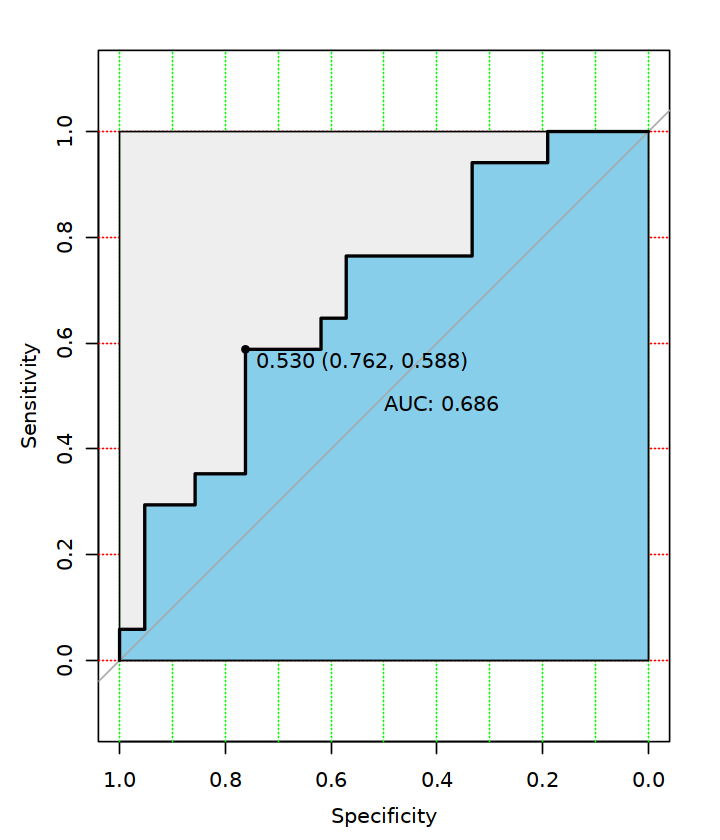

In [118]:
roc_curve <- pROC::roc(as.numeric(data$Group),fold_predict)
plot(roc_curve, print.auc=TRUE, auc.polygon=TRUE, grid=c(0.1, 0.2),
     grid.col=c("green", "red"), max.auc.polygon=TRUE,
     auc.polygon.col="skyblue", print.thres=TRUE,main="")

In [132]:
head(data,2)

,V1,V2,V3,V4,V5,V6,V1,H4C3,PRSS3,TUSC3,Group
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,SL32231,46,MD,M,X3064,DLPFC,SL32231,11.94163,17.44225,19.64170,1
2,SL32242,32,Control,M,X3186,DLPFC,SL32242,12.55677,17.66988,19.58316,0


In [133]:
fold_pre <- glm(Group~H4C3+TUSC3+PRSS3,data=data,family=binomial())
fold_predict <- predict(fold_pre,type='response',newdata=data)

In [134]:
library(pROC)

Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var




In [138]:
pdf('./figure/fig7.testset1.roc.pdf',width = 6,height = 6)
rocobj1 <- plot.roc(data$Group, data$H4C3,percent=TRUE, levels=c(1,0),direction="<",col="#1c61b6")
rocobj2 <- lines.roc(data$Group, data$PRSS3,percent=TRUE, levels=c(1,0),direction="<", col="#008600")
rocobj3 <- lines.roc(data$Group, data$TUSC3,percent=TRUE, levels=c(0,1),direction="<", col="#9C6D35")
rocobj5 <- lines.roc(data$Group, fold_predict,percent=TRUE, levels=c(0,1),direction="<", col="#9F1A70")
legend("topleft", legend=c(paste0("H4C3 ", round(rocobj1$auc/100,digits = 2)),
                               paste0("PRSS3 ", round(rocobj2$auc/100,digits = 2)),
                               paste0("TUSC3 ", round(rocobj3$auc/100,digits = 2)),
                               paste0("model_predict ", round(rocobj5$auc/100,digits = 2))),
       col=c("#1c61b6", "#008600","#9C6D35","#9F1A70"), lwd=1)
dev.off()

png 
  2